## BREAKING IMAGE CAPTCHA CNN MODEL WITH CIFAR-10 Dataset 2

In [8]:
### Import various libraries ###
from tensorflow import keras
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models
import numpy as np
from tensorflow.keras.layers import BatchNormalization,Dense,Dropout,Flatten,Activation
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.constraints import maxnorm
from keras.models import Sequential
from keras.utils.vis_utils import plot_model

In [2]:
### Import CIFAR-10 Data ###
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

In [3]:
### Shape of the Training data ###
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
### Shape of the Test data ###
print(Y_train.shape)
print(Y_test.shape)

(50000, 1)
(10000, 1)


In [5]:
### Convert data to 'float32' and Normalize data by dividing both X train test by 255 ###
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
### Check converted and normalized data ###
print(X_train.dtype)
print(X_test.dtype)
print(X_train[0])
print(X_test[0])

float32
float32
[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235

In [7]:
### One-Hot Encoding to change y values from 1 dimensional arrays to 10 dimensional matrices
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
class_num=Y_test.shape[1]

In [9]:
### Building the CNN ###
cnn = Sequential()

cnn.add(Conv2D(32,(3,3),input_shape=X_train.shape[1:],padding='same'))
cnn.add(Activation('relu'))

cnn.add(Dropout(0.2))

cnn.add(BatchNormalization())

cnn.add(Conv2D(64,(3,3),padding='same'))
cnn.add(Activation('relu'))

cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))
cnn.add(BatchNormalization())

cnn.add(Conv2D(64,(3,3),padding='same'))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))
cnn.add(BatchNormalization())

cnn.add(Conv2D(128,(3,3),padding='same'))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.2))
cnn.add(BatchNormalization())

cnn.add(Flatten())
cnn.add(Dropout(0.2))

cnn.add(Dense(256,kernel_constraint=maxnorm(3)))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.2))
cnn.add(BatchNormalization())

cnn.add(Dense(128,kernel_constraint=maxnorm(3)))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.2))
cnn.add(BatchNormalization())

cnn.add(Dense(class_num))
cnn.add(Activation('softmax'))

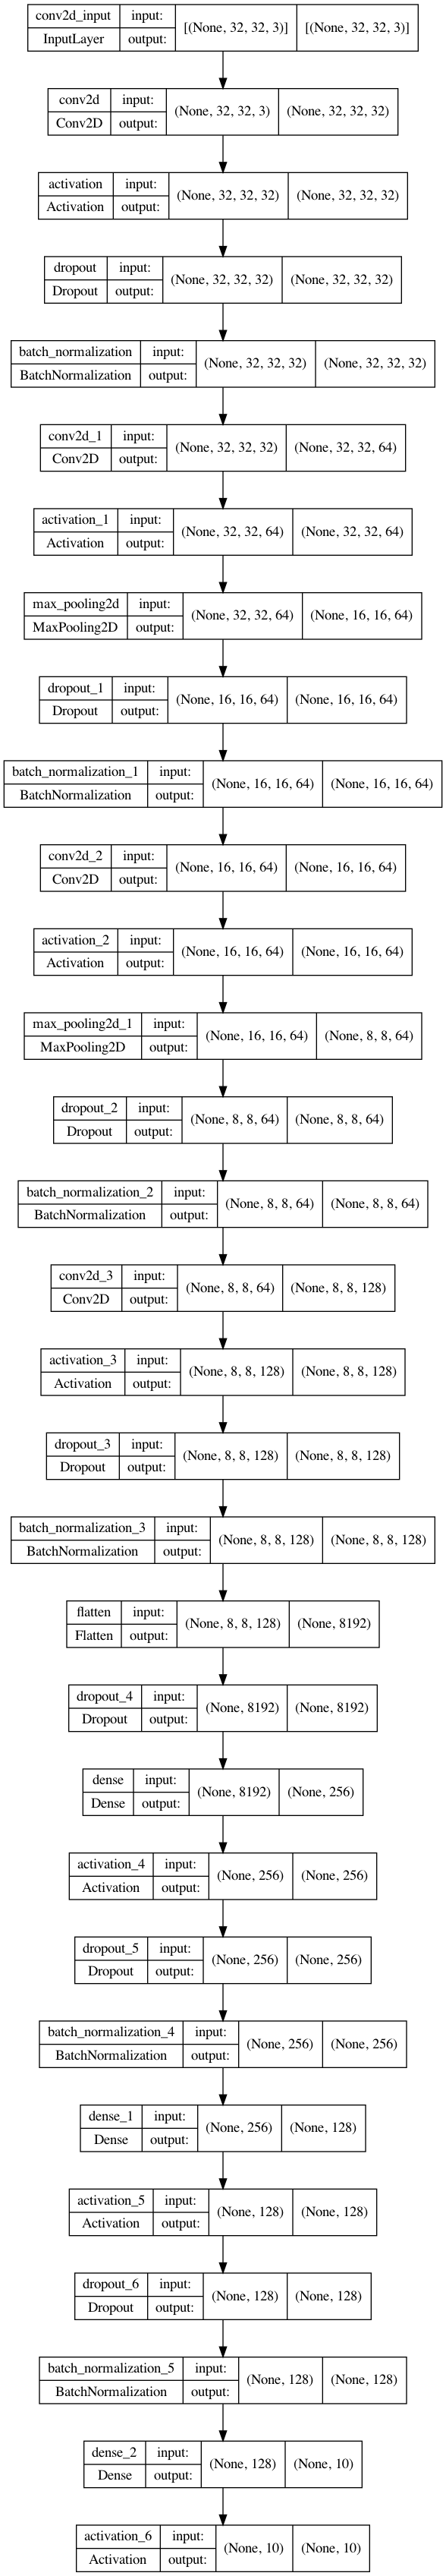

In [10]:
### Print network for viewing ###
plot_model(cnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [11]:
### Network Compilation ###
epochs = 25
optimizer = 'adam'

cnn.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [12]:
### Model summary ###
print(cnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 32, 32, 64)        0         
                                                        

In [13]:
### Fitting the model ###
history = cnn.fit(X_train,Y_train,
                  validation_data=(X_test,Y_test),
                  epochs=epochs,batch_size=64)

Epoch 1/25
782/782 [==============================] - 192s 244ms/step - loss: 1.5201 - accuracy: 0.4632 - val_loss: 1.5078 - val_accuracy: 0.4900
Epoch 2/25
782/782 [==============================] - 212s 271ms/step - loss: 1.0261 - accuracy: 0.6363 - val_loss: 0.9082 - val_accuracy: 0.6885
Epoch 3/25
782/782 [==============================] - 223s 285ms/step - loss: 0.8541 - accuracy: 0.6989 - val_loss: 0.8599 - val_accuracy: 0.6999
Epoch 4/25
782/782 [==============================] - 231s 295ms/step - loss: 0.7575 - accuracy: 0.7351 - val_loss: 0.6994 - val_accuracy: 0.7558
Epoch 5/25
782/782 [==============================] - 218s 279ms/step - loss: 0.6971 - accuracy: 0.7555 - val_loss: 0.6642 - val_accuracy: 0.7709
Epoch 6/25
782/782 [==============================] - 206s 263ms/step - loss: 0.6581 - accuracy: 0.7699 - val_loss: 0.6998 - val_accuracy: 0.7553
Epoch 7/25
782/782 [==============================] - 196s 250ms/step - loss: 0.6178 - accuracy: 0.7841 - val_loss: 0.7641 -

In [14]:
### Model score ###
score = cnn.evaluate(X_test,Y_test,verbose=0)
print('Model Accuracy:%.2f%%'%(score[1]*100))

Model Accuracy:81.49%


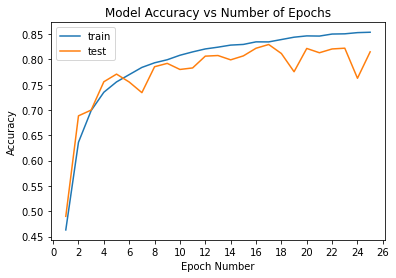

In [16]:
### Plot the comparison between training and test accuracy ###
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1,1+len(history.history['accuracy'])), history.history['accuracy'])
plt.plot(range(1,1+len(history.history['val_accuracy'])), history.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0,28,2))
plt.show()

In [18]:
### Training performance ###
## Find highest score for the test data ##
highest_score = max(history.history['val_accuracy'])

## Find the training epoch that has the highest test accuracy score 
epoch_num = np.array(history.history['val_accuracy']).argmax()+1

## Print the performance accuracy and training epoch
print((highest_score, epoch_num))

(0.8294000029563904, 17)
